Importerer nødvendige biblioteker

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import IPython.display as display


In [2]:
file_path = '../data/csv/ENOL_wind_data.csv'
df_ENOL = pd.read_csv(file_path)

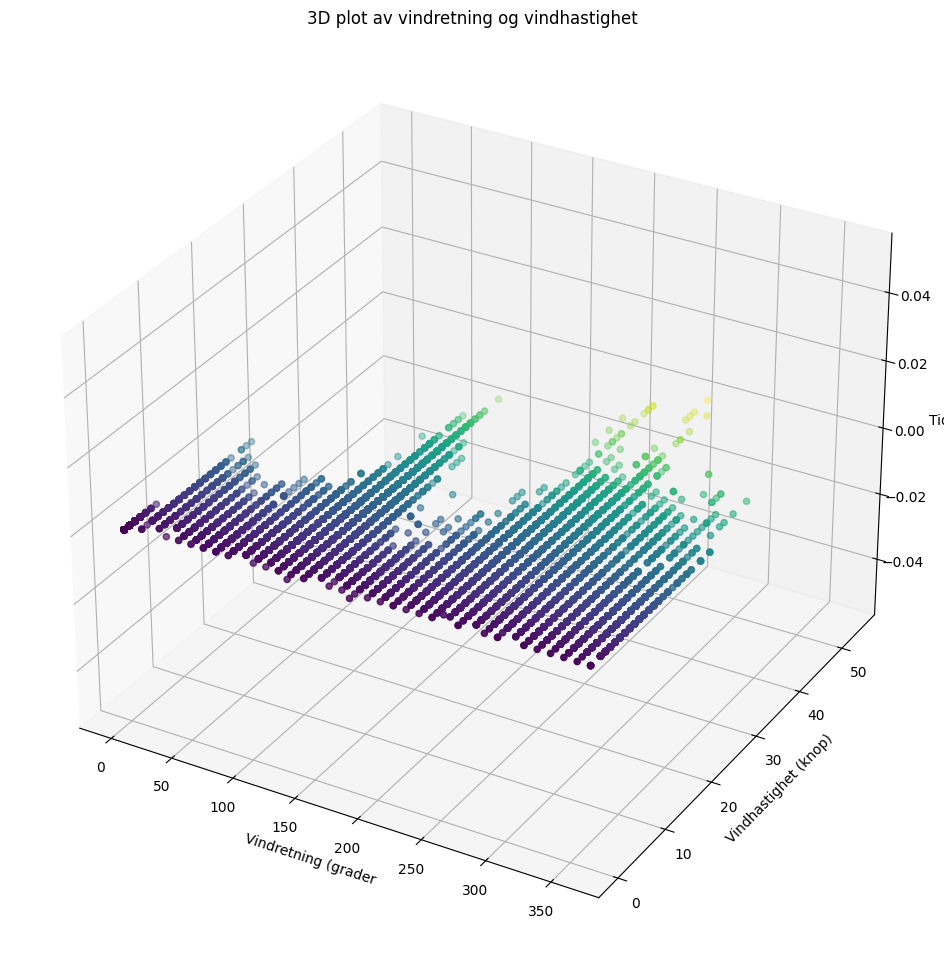

In [3]:
# 3D plot av vindretning og vindhastighet

fig = plt.figure(figsize=(40, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ENOL['Wind_direction'], df_ENOL['Wind_speed'], c=df_ENOL['Wind_speed'], cmap='viridis', marker='o')
ax.set_title('3D plot av vindretning og vindhastighet')
ax.set_xlabel('Vindretning (grader')
ax.set_ylabel('Vindhastighet (knop)')
ax.set_zlabel('Tid') # Får ikke tid helt til å fungere i denne framstillingen.
plt.show()

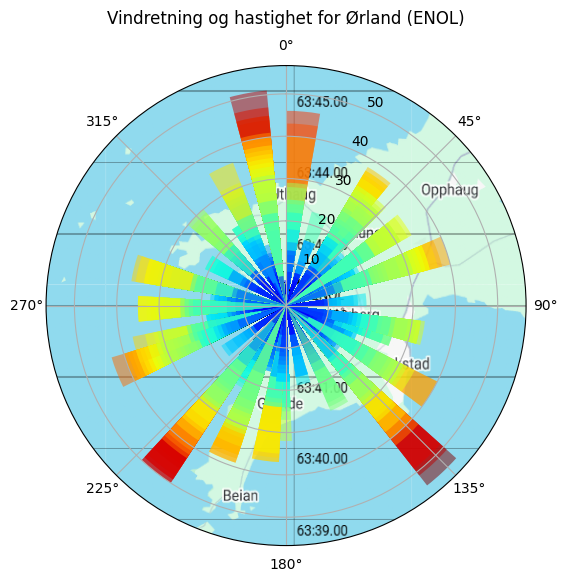

In [4]:
# Konverter vindretningen fra grader til radianer (for polarplot)
theta = df_ENOL['Wind_direction']
radii = df_ENOL['Wind_speed']

# Sett en konstant bredde for stolpene, f.eks. 10 grader (omregnet til radianer)
width = np.deg2rad(10)

# Lag figur og polar akse
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

ax.set_theta_zero_location("N") # Sett nullpunktet til nord
ax.set_theta_direction(-1)

img = plt.imread("../resources/images/ENOL_kart.png")
ax.imshow(img, extent=[0, 1, 0, 1], transform=ax.transAxes, zorder=0)

# Lag stolpediagrammet
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Tilpass farger etter vindhastigheten
for r, bar in zip(radii, bars):
    bar.set_facecolor(cm.jet(r / np.max(radii)))
    bar.set_alpha(0.5)

ax.set_title("Vindretning og hastighet for Ørland (ENOL)", pad=30)

plt.show()

In [5]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

avg_wind_speed = [
    df_ENOL['Wind_speed'][:48*31].mean(),           # Jan
    df_ENOL['Wind_speed'][48*31:48*60].mean(),      # Feb (skuddår i 2024)
    df_ENOL['Wind_speed'][48*60:48*91].mean(),      # Mar
    df_ENOL['Wind_speed'][48*91:48*121].mean(),     # Apr
    df_ENOL['Wind_speed'][48*121:48*152].mean(),    # May
    df_ENOL['Wind_speed'][48*152:48*182].mean(),    # Jun
    df_ENOL['Wind_speed'][48*182:48*213].mean(),    # Jul
    df_ENOL['Wind_speed'][48*213:48*244].mean(),    # Aug
    df_ENOL['Wind_speed'][48*244:48*274].mean(),    # Sep
    df_ENOL['Wind_speed'][48*274:48*305].mean(),    # Oct
    df_ENOL['Wind_speed'][48*305:48*335].mean(),    # Nov
    df_ENOL['Wind_speed'][48*335:48*366].mean()     # Dec
]

avg_wind_direction = [
    df_ENOL['Wind_direction'][:48*31].mean(),           # Jan
    df_ENOL['Wind_direction'][48*31:48*60].mean(),      # Feb (skuddår i 2024)
    df_ENOL['Wind_direction'][48*60:48*91].mean(),      # Mar
    df_ENOL['Wind_direction'][48*91:48*121].mean(),     # Apr
    df_ENOL['Wind_direction'][48*121:48*152].mean(),    # May
    df_ENOL['Wind_direction'][48*152:48*182].mean(),    # Jun
    df_ENOL['Wind_direction'][48*182:48*213].mean(),    # Jul
    df_ENOL['Wind_direction'][48*213:48*244].mean(),    # Aug
    df_ENOL['Wind_direction'][48*244:48*274].mean(),    # Sep
    df_ENOL['Wind_direction'][48*274:48*305].mean(),    # Oct
    df_ENOL['Wind_direction'][48*305:48*335].mean(),    # Nov
    df_ENOL['Wind_direction'][48*335:48*366].mean()     # Dec
]


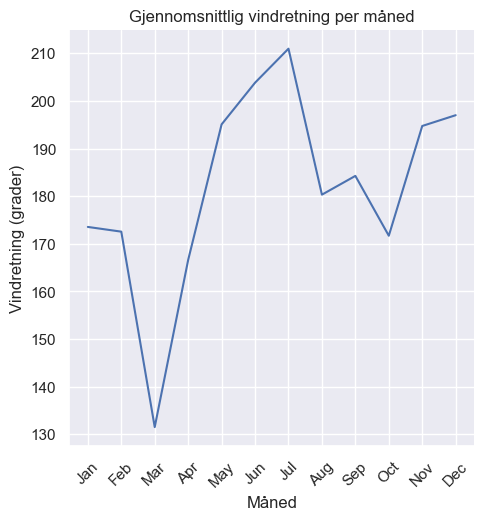

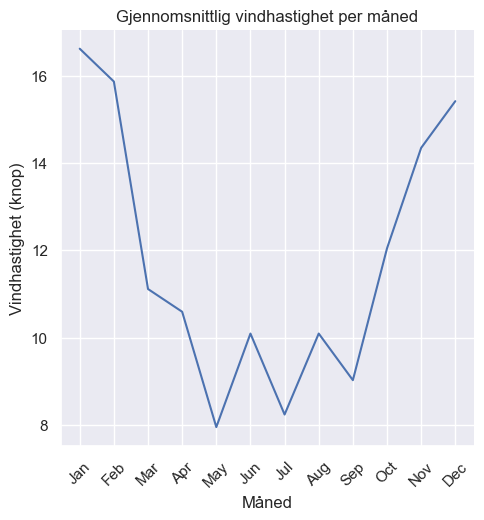

In [6]:
sns.set_theme(style="darkgrid")
sns.relplot(x = months, y = avg_wind_direction, kind="line")
plt.xticks(rotation=45)
plt.xlabel("Måned")
plt.ylabel("Vindretning (grader)")
plt.title("Gjennomsnittlig vindretning per måned")
plt.show()

# Plotting gjennomsnittlig vindhastighet per måned
sns.relplot(x = months, y = avg_wind_speed, kind="line")
plt.xticks(rotation=45)
plt.xlabel("Måned")
plt.ylabel("Vindhastighet (knop)")
plt.title("Gjennomsnittlig vindhastighet per måned")
plt.show()


In [7]:
# Er standardaviken for vindhastighet og vindkast-hastighet lik?
std_wind_speed = df_ENOL['Wind_speed'].std()
std_gust_speed = df_ENOL['Gust_speed'].std()
std_wind_direction = df_ENOL['Wind_direction'].std()


print(f"Standardavvik vindhastighet: {std_wind_speed} for Ørland")
print(f"Standardavvik vindkast-hastighet: {std_gust_speed} for Ørland")
print(f"\nStandardavvik vindretning: {std_wind_direction} for Ørland")
print(f"\nVi ser at standardavviktet ikke er alt for høyt når deg gjelder vindhastighet og vindkast-hastighet. \nMen når vi ser på vindretning er det veldig stor variasjon{std_wind_direction}. Dette gir mening med tanke på valg av data.")
# Er standaraviken større for vindhastighet når det er lavt trykk?



Standardavvik vindhastighet: 7.122203361724569 for Ørland
Standardavvik vindkast-hastighet: 7.381538960718694 for Ørland

Standardavvik vindretning: 93.30998652430992 for Ørland

Vi ser at standardavviktet ikke er alt for høyt når deg gjelder vindhastighet og vindkast-hastighet. 
Men når vi ser på vindretning er det veldig stor variasjon93.30998652430992. Dette gir mening med tanke på valg av data.


Vi ser en sammenheng mellom vindhastighet og trykk QNH. 
Når trykket er lavt er det høyere vindhastighet enn når trykket er høyt. 
Dette gir mening med tanke på at lavtrykk gir mer vind og høytrykk gir mindre vind.
Samme gjelder for Vindkast-hastighet, vinden er mer uregelmessig når trykket er lavt.


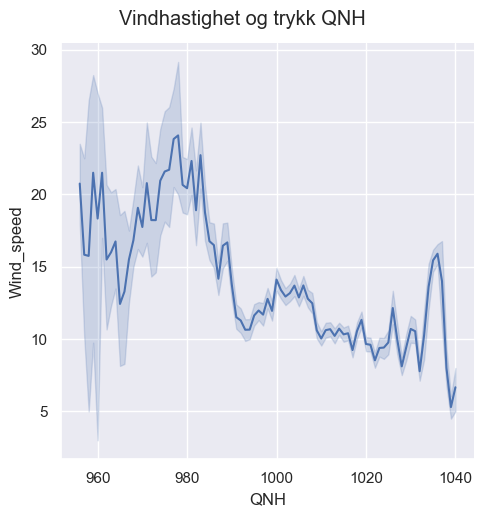

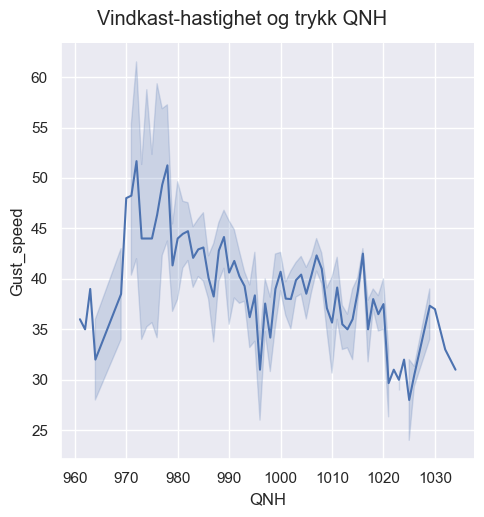

In [8]:
# Drøfter rundt plot 
print("Vi ser en sammenheng mellom vindhastighet og trykk QNH. \nNår trykket er lavt er det høyere vindhastighet enn når trykket er høyt. \nDette gir mening med tanke på at lavtrykk gir mer vind og høytrykk gir mindre vind.\nSamme gjelder for Vindkast-hastighet, vinden er mer uregelmessig når trykket er lavt.")

# Første plott
plot1 = sns.relplot(x="QNH", y="Wind_speed", kind="line", data=df_ENOL)
_ = plot1.fig.suptitle("Vindhastighet og trykk QNH", y=1.03)  # Setter tittel

# Andre plott
plot2 = sns.relplot(x="QNH", y="Gust_speed", kind="line", data=df_ENOL)
_ = plot2.fig.suptitle("Vindkast-hastighet og trykk QNH", y=1.03)  # Setter tittel



In [9]:
#henter fil fra src mappa.
sys.path.insert(0, '../src/')
from avg_widget import avg_widget

# Interaktiv widget
widgets.interact(
    avg_widget, 
    ses=widgets.FloatSlider(min=0.1, max=5, step=0.25, value=2.5, description='Glatting (ses)')
)

interactive(children=(FloatSlider(value=2.5, description='Glatting (ses)', max=5.0, min=0.1, step=0.25), Outpu…

<function avg_widget.avg_widget(ses=2.5)>

Arealt under kurven er alltid 1 da dette representerer hele fordelingen.
Simple exponential smoothing er forkortet som ses.
